In [1]:
import cairo
from IPython.display import Image, display
from math import pi
from io import BytesIO

def disp(draw_func):
    surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, 200, 200)
    ctx = cairo.Context(surface)
    draw_func(ctx, 200, 200)
    with BytesIO() as fileobj:
        surface.write_to_png(fileobj)
        display(Image(fileobj.getvalue(), width=200))



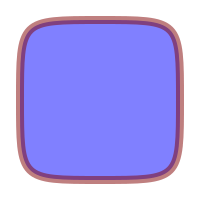

In [2]:
@disp
def draw(cr, width, height):
    cr.scale(width, height)
    cr.set_line_width(0.04)

    # a custom shape, that could be wrapped in a function
    x0 = 0.1  # parameters like cairo_rectangle
    y0 = 0.1
    rect_width = 0.8
    rect_height = 0.8
    radius = 0.4  # and an approximate curvature radius

    x1 = x0 + rect_width
    y1 = y0 + rect_height

    if rect_width / 2 < radius:
        if rect_height / 2 < radius:
            cr.move_to(x0, (y0 + y1) / 2)
            cr.curve_to(x0, y0, x0, y0, (x0 + x1) / 2, y0)
            cr.curve_to(x1, y0, x1, y0, x1, (y0 + y1) / 2)
            cr.curve_to(x1, y1, x1, y1, (x1 + x0) / 2, y1)
            cr.curve_to(x0, y1, x0, y1, x0, (y0 + y1) / 2)
        else:
            cr.move_to(x0, y0 + radius)
            cr.curve_to(x0, y0, x0, y0, (x0 + x1) / 2, y0)
            cr.curve_to(x1, y0, x1, y0, x1, y0 + radius)
            cr.line_to(x1, y1 - radius)
            cr.curve_to(x1, y1, x1, y1, (x1 + x0) / 2, y1)
            cr.curve_to(x0, y1, x0, y1, x0, y1 - radius)
    else:
        if rect_height / 2 < radius:
            cr.move_to(x0, (y0 + y1) / 2)
            cr.curve_to(x0, y0, x0, y0, x0 + radius, y0)
            cr.line_to(x1 - radius, y0)
            cr.curve_to(x1, y0, x1, y0, x1, (y0 + y1) / 2)
            cr.curve_to(x1, y1, x1, y1, x1 - radius, y1)
            cr.line_to(x0 + radius, y1)
            cr.curve_to(x0, y1, x0, y1, x0, (y0 + y1) / 2)
        else:
            cr.move_to(x0, y0 + radius)
            cr.curve_to(x0, y0, x0, y0, x0 + radius, y0)
            cr.line_to(x1 - radius, y0)
            cr.curve_to(x1, y0, x1, y0, x1, y0 + radius)
            cr.line_to(x1, y1 - radius)
            cr.curve_to(x1, y1, x1, y1, x1 - radius, y1)
            cr.line_to(x0 + radius, y1)
            cr.curve_to(x0, y1, x0, y1, x0, y1 - radius)

    cr.close_path()

    cr.set_source_rgb(0.5, 0.5, 1)
    cr.fill_preserve()
    cr.set_source_rgba(0.5, 0, 0, 0.5)
    cr.stroke()

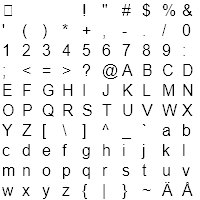

In [3]:

@disp
def draw(cr, width, height):
    cr.scale(width, height)
    cr.set_line_width(0.04)

    cr.select_font_face("Sans", cairo.FONT_SLANT_NORMAL,
                        cairo.FONT_WEIGHT_NORMAL)
    # draw 0.08 glyphs in 0.10 squares, at(0.01, 0.02) from left corner
    cr.set_font_size(0.08)

    glyphs = []
    index = 0
    for y in range(10):
        for x in range(10):
            glyphs.append((index, x / 10.0 + 0.01, y / 10.0 + 0.08))
            index += 1

    cr.show_glyphs(glyphs)

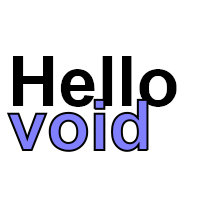

In [9]:
@disp
def draw(cr, width, height):
    cr.scale(width, height)
    cr.set_line_width(0.04)

    cr.select_font_face("Sans", cairo.FONT_SLANT_NORMAL,
                        cairo.FONT_WEIGHT_BOLD)
    cr.set_font_size(0.35)

    cr.move_to(0.04, 0.53)
    cr.show_text("Hello")

    cr.move_to(0.04, 0.75)
    cr.text_path("void")
    cr.set_source_rgb(0.5, 0.5, 1)
    cr.fill_preserve()
    cr.set_source_rgb(0, 0, 0)
    cr.set_line_width(0.01)
    cr.stroke()

    # draw helping lines
    cr.set_source_rgba(1, 0.2, 0.2, 0.6)
    cr.fill()

In [3]:
import cairo

with cairo.ImageSurface(cairo.FORMAT_ARGB32, 200, 200) as surface:
    context = cairo.Context(surface)
    x, y, x1, y1 = 0.1, 0.5, 0.4, 0.9
    x2, y2, x3, y3 = 0.6, 0.1, 0.9, 0.5
    context.scale(200, 200)
    context.set_line_width(0.04)
    context.move_to(x, y)
    context.curve_to(x1, y1, x2, y2, x3, y3)
    context.stroke()
    context.set_source_rgba(1, 0.8, 0.2, 0.6)
    context.set_line_width(0.02)
    context.move_to(x, y)
    context.line_to(x1, y1)
    context.move_to(x2, y2)
    context.line_to(x3, y3)
    context.stroke()

    surface.write_to_png("output.png")